In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy.stats import ttest_ind

In [2]:
#Load data
transactionData = pd.read_csv("QVI_transaction_data.csv")
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
customerData=pd.read_csv("QVI_purchase_behaviour.csv")
customerData

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
#Exploratory data analysis
transactionData.info()
print(transactionData.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   
5  43604          4      

In [5]:
print(transactionData.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [6]:
print(transactionData.columns)

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')


In [7]:
print(transactionData.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [8]:
#convert date to date format
transactionData['DATE']=pd.to_datetime(transactionData['DATE'],origin='1899-12-30',unit='D')

In [9]:
print(transactionData.dtypes)

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object


In [10]:
print(transactionData.head(10))

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   
5 2019-05-19          4            4074    2982        57   
6 2019-05-16          4            4149    3333        16   
7 2019-05-16          4            4196    3539        24   
8 2018-08-20          5            5026    4525        42   
9 2018-08-18          7            7150    6900        52   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       

In [11]:
# looking at PROD_NAME
print(transactionData['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [12]:
print(transactionData['PROD_NAME'].value_counts())

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


In [13]:
print(f"Number of Unique Product : {transactionData['PROD_NAME'].nunique()}")

Number of Unique Product : 114


In [14]:
#unique product
unique_product= transactionData['PROD_NAME'].unique()

#split into word
product_words= pd.Series(' '.join(unique_product).split())

#dataframe
product_words_df=pd.DataFrame(product_words, columns=['Word'])

#count
print(product_words_df['Word'].value_counts())

Word
175g               26
Chips              21
150g               19
&                  17
Smiths             16
                   ..
Fig                 1
Mac                 1
N                   1
Seasonedchicken     1
Bolognese           1
Name: count, Length: 220, dtype: int64


In [15]:
#unique product
unique_product= transactionData['PROD_NAME'].dropna().unique()
all_words=' '.join(unique_product).lower().split()

#remove digit, special symbols
clean_words=[word for word in all_words if re.match(r'^[a-zA-Z]+$',word)]

#convert into dataframe and count
word_counts=pd.Series(clean_words).value_counts().reset_index()
print(word_counts)
word_counts.columns=["word","frequency"]

print(word_counts.head(10))

          index  count
0         chips     21
1        smiths     16
2       crinkle     14
3           cut     14
4        kettle     13
..          ...    ...
163   camembert      1
164   potatomix      1
165  sweetchili      1
166       pesto      1
167   bolognese      1

[168 rows x 2 columns]
       word  frequency
0     chips         21
1    smiths         16
2   crinkle         14
3       cut         14
4    kettle         13
5      salt         12
6    cheese         12
7  original         10
8   doritos          9
9      chip          9


In [16]:
#remove Salsa

salsa_mask=transactionData['PROD_NAME'].str.lower().str.contains('salsa', na=False)

transactionData=transactionData[~salsa_mask]

In [17]:
#summary
print(transactionData.describe(include='all'))

                                 DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                          246742  246742.000000    2.467420e+05   
unique                            NaN            NaN             NaN   
top                               NaN            NaN             NaN   
freq                              NaN            NaN             NaN   
mean    2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min               2018-07-01 00:00:00       1.000000    1.000000e+03   
25%               2018-09-30 00:00:00      70.000000    7.001500e+04   
50%               2018-12-30 00:00:00     130.000000    1.303670e+05   
75%               2019-03-31 00:00:00     203.000000    2.030840e+05   
max               2019-06-30 00:00:00     272.000000    2.373711e+06   
std                               NaN      76.787096    8.071528e+04   

              TXN_ID       PROD_NBR                               PROD_NAME  \
count   2.467420e+05  246742.000000                     

In [18]:
print(transactionData.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [19]:
#200 product quantity
outlier_transaction= transactionData[transactionData['PROD_QTY']==200]
print(outlier_transaction)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [20]:
#customer had another transaction

outlier_customer_id= transactionData[transactionData['PROD_QTY']==200]['LYLTY_CARD_NBR'].unique()[0]
customer_transaction= transactionData[transactionData['LYLTY_CARD_NBR']== outlier_customer_id]

print(customer_transaction)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [21]:
#remove that customer from further analysis

outlier_customer_id= transactionData[transactionData['PROD_QTY']==200]['LYLTY_CARD_NBR'].unique()[0]
transactionData= transactionData[transactionData['LYLTY_CARD_NBR']!= outlier_customer_id]

print(transactionData.describe())

print("\nTop values for PROD_QTY:")
print(transactionData['PROD_QTY'].value_counts().sort_index(ascending=False).head(10))

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467400e+05  246740.000000  246740.000000  246740.000000  
mean   1.351304e+05      56.352213       1.906456       7.316113  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756875e+04      26.000000       2.000000       5.800000  
50%    1.351815e+05      

          DATE  transaction_count
0   2018-07-01                663
1   2018-07-02                650
2   2018-07-03                674
3   2018-07-04                669
4   2018-07-05                660
..         ...                ...
359 2019-06-26                657
360 2019-06-27                669
361 2019-06-28                673
362 2019-06-29                703
363 2019-06-30                704

[364 rows x 2 columns]


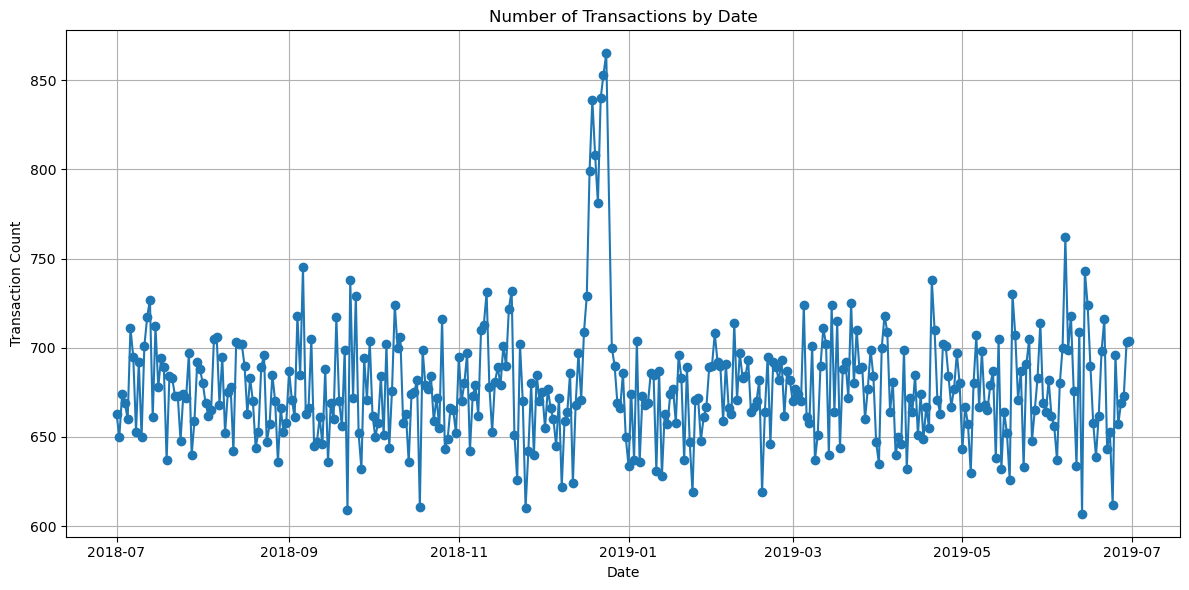

In [22]:
#missing data

transactions_by_date = transactionData.groupby('DATE').size().reset_index(name='transaction_count')

# Display the result
print(transactions_by_date)

#plot
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_date['DATE'], transactions_by_date['transaction_count'], marker='o', linestyle='-')
plt.title('Number of Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
#create full date range

full_date_range= pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30')})

In [24]:
transactions_by_date =transactionData.groupby('DATE').size().reset_index(name='transaction_count')

In [56]:
transactions_full =pd.merge(full_date_range,transactions_by_date, on='DATE', how='left')

#transactions_full['transaction_count'].fillna(0,inplace=True)
transactions_full['transaction_count'] = transactions_full['transaction_count'].fillna(0)


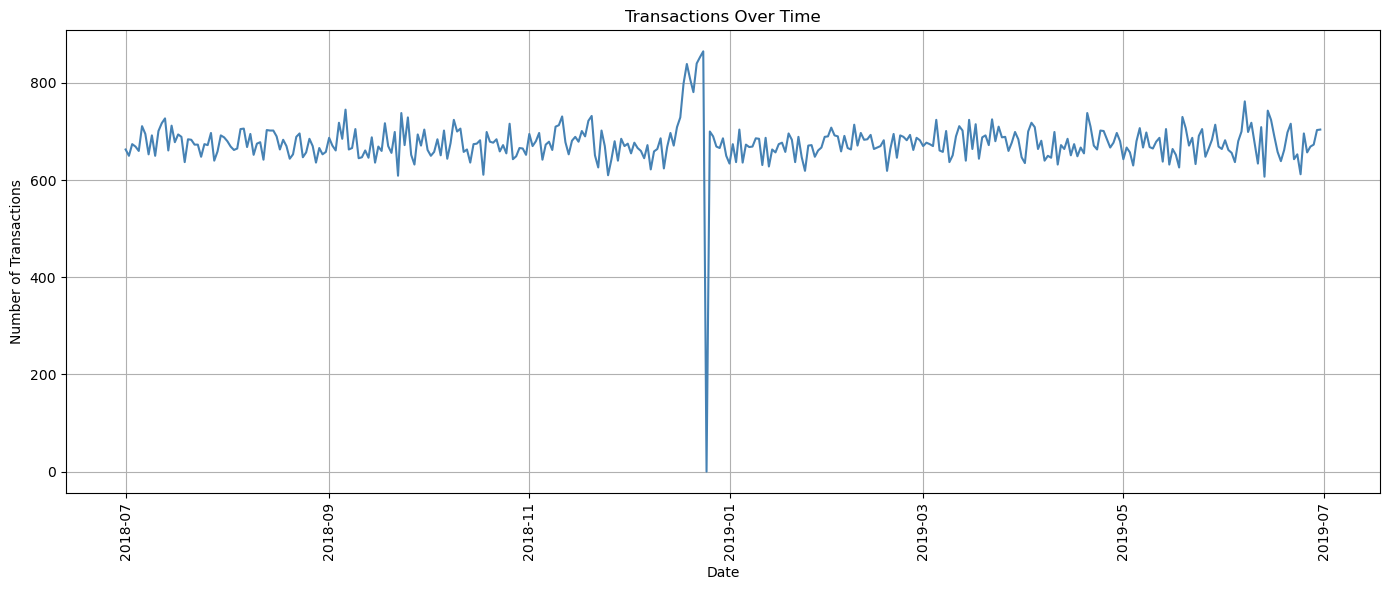

In [26]:
#Plot the time series

plt.figure(figsize=(14, 6))
plt.plot(transactions_full['DATE'], transactions_full['transaction_count'], color='steelblue')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

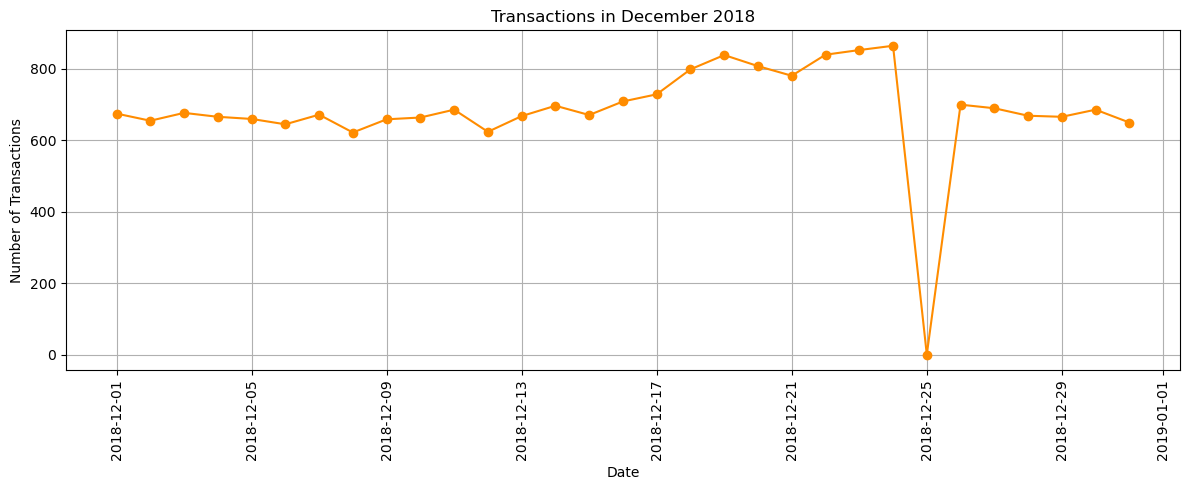

In [27]:
#zoom in december 2018

# Filter for December 2018
december_data = transactions_full[
    (transactions_full['DATE'] >= '2018-12-01') & 
    (transactions_full['DATE'] <= '2018-12-31')
]

# Plot December data
plt.figure(figsize=(12, 5))
plt.plot(december_data['DATE'], december_data['transaction_count'], marker='o', linestyle='-', color='darkorange')
plt.title('Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [60]:
#Check pack size

transactionData['PACK_SIZE']= transactionData['PROD_NAME'].str.extract(r'(\d+)').astype(float)
print(transactionData['PACK_SIZE'])

0         175.0
1         175.0
2         170.0
3         175.0
4         150.0
          ...  
264831    175.0
264832    175.0
264833    170.0
264834    150.0
264835    175.0
Name: PACK_SIZE, Length: 246740, dtype: float64


In [64]:
print(transactionData['PACK_SIZE'].min())

70.0


In [66]:
print(transactionData['PACK_SIZE'].max())

380.0


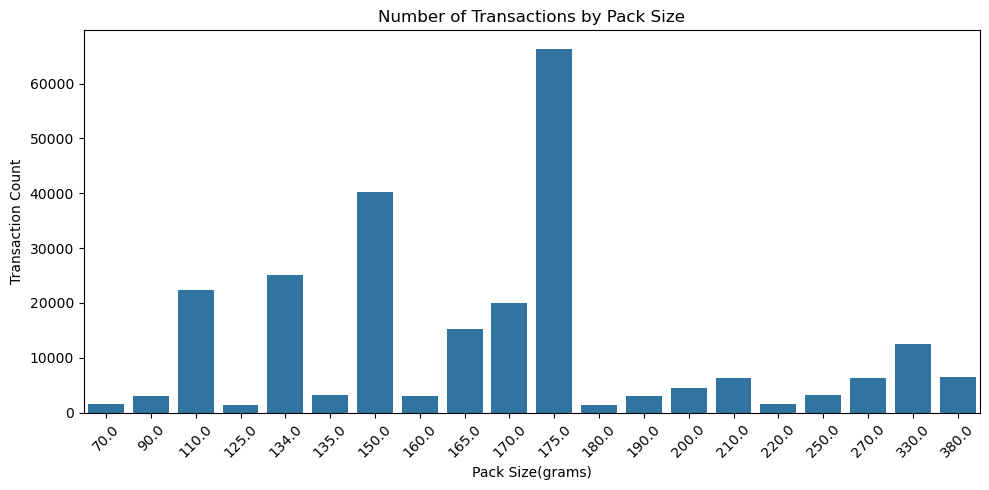

In [72]:
#histogram of PACK_SIZE

plt.figure(figsize=(10,5))
sns.countplot(x='PACK_SIZE',data=transactionData, order= sorted(transactionData['PACK_SIZE'].dropna().unique()))

plt.title("Number of Transactions by Pack Size")
plt.xlabel("Pack Size(grams)")
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
#extract brand name

transactionData['BRAND']= transactionData['PROD_NAME'].str.split().str[0]
print(transactionData['BRAND'])

#count
print("\nCount is :",transactionData['BRAND'].value_counts())

#unique
print("\nNumber of unique brands:", transactionData['BRAND'].unique())

#unique brand
print("\nNumber of unique brands:", transactionData['BRAND'].nunique())

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: BRAND, Length: 246740, dtype: object

Count is : BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

Number of unique brands: ['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red'

In [94]:
#clean brand name like RED or RRD

transactionData['BRAND']= transactionData['BRAND'].str.upper()

brand_fixes = {
    'RED': 'RRD',           # Red Rock Deli
    'RRD': 'RRD',
    'SNBTS': 'SUNBITES',    # Abbreviated form
    'INFZNS': 'INFUZIONS',  # Misspelled
    'NCC': 'NATURAL',       # Likely shorthand
    'WW': 'WOOLWORTHS',     # Store brand
    'SMITH': 'SMITHS',       # Consistency
    'DORITO': 'DORITOS'
}

transactionData['BRAND'] = transactionData['BRAND'].replace(brand_fixes)

In [96]:
print(transactionData['BRAND'].value_counts())

BRAND
KETTLE        41288
SMITHS        30353
DORITOS       25224
PRINGLES      25102
RRD           16321
INFUZIONS     14201
THINS         14075
WOOLWORTHS    11836
COBS           9693
TOSTITOS       9471
TWISTIES       9454
NATURAL        7469
TYRRELLS       6442
GRAIN          6272
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
GRNWVES        1468
FRENCH         1418
Name: count, dtype: int64


In [102]:
# Basic information about customer data

print(customerData.info())

print(customerData.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
        LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN


In [108]:
#check for null

print("Missing value per column:\n",customerData.isnull().sum())

Missing value per column:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [110]:
# Distribution of customer life stages
print("\nLIFESTAGE distribution:\n", customerData['LIFESTAGE'].value_counts())

# Distribution of premium customer status
print("\nPREMIUM_CUSTOMER distribution:\n", customerData['PREMIUM_CUSTOMER'].value_counts())


LIFESTAGE distribution:
 LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

PREMIUM_CUSTOMER distribution:
 PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


In [114]:
#Merge

merged_data=pd.merge(transactionData, customerData, on ='LYLTY_CARD_NBR', how='left')

#missing customer

missing_customer=merged_data[merged_data['LIFESTAGE'].isnull() |merged_data['PREMIUM_CUSTOMER'].isnull()] 
print(f"Number of transactions without matched customer info: {missing_customer.shape[0]}")

Number of transactions without matched customer info: 0


In [116]:
print(merged_data)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
246735 2019-03-09        272          272319  270088        89   
246736 2018-08-13        272          272358  270154        74   
246737 2018-11-06        272          272379  270187        51   
246738 2018-12-27        272          272379  270188        42   
246739 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [118]:
#convert into csv

merged_data.to_csv("QVI_mergedData.csv", index=False)

In [126]:
#calculate Total Sales by segment

sales_by_segment = (
    merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
    .sum()
    .reset_index()
    .sort_values(by='TOT_SALES', ascending=False)
)

print(sales_by_segment)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  156863.75
19   YOUNG SINGLES/COUPLES       Mainstream  147582.20
13                RETIREES       Mainstream  145168.95
15          YOUNG FAMILIES           Budget  129717.95
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
7           OLDER FAMILIES       Mainstream   96413.55
14                RETIREES          Premium   91296.65
16          YOUNG FAMILIES       Mainstream   86338.25
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
17          YOUNG FAMILIES          Premium   78571.70
8           OLDER FAMILIES          Premium   75242.60
18   YOUNG SINGLES/COUPLES           Budget   57122.10
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
20   YOUNG SINGLES/COUPLES          Premium   39052.30
0   MIDAGE

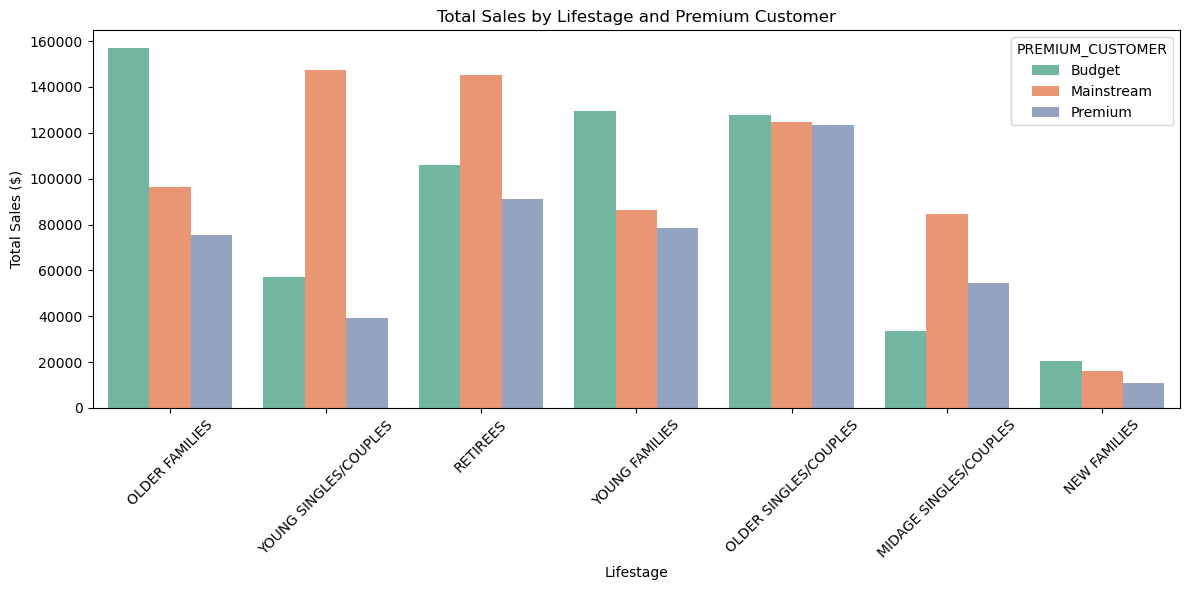

In [128]:
#Visualize

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_by_segment,
    x='LIFESTAGE',
    y='TOT_SALES',
    hue='PREMIUM_CUSTOMER',
    palette='Set2'
)

# Plot styling
plt.title('Total Sales by Lifestage and Premium Customer')
plt.ylabel('Total Sales ($)')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [130]:
#count unique customer by segment

customer_by_segment= (
    merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR']
    .nunique()
    .reset_index(name='NUM_CUSTOMERS')
    .sort_values(by='NUM_CUSTOMERS',ascending=False)
)

print(customer_by_segment)

                 LIFESTAGE PREMIUM_CUSTOMER  NUM_CUSTOMERS
19   YOUNG SINGLES/COUPLES       Mainstream           7917
13                RETIREES       Mainstream           6358
10   OLDER SINGLES/COUPLES       Mainstream           4858
9    OLDER SINGLES/COUPLES           Budget           4849
11   OLDER SINGLES/COUPLES          Premium           4682
6           OLDER FAMILIES           Budget           4611
12                RETIREES           Budget           4385
15          YOUNG FAMILIES           Budget           3953
14                RETIREES          Premium           3812
18   YOUNG SINGLES/COUPLES           Budget           3647
1   MIDAGE SINGLES/COUPLES       Mainstream           3298
7           OLDER FAMILIES       Mainstream           2788
16          YOUNG FAMILIES       Mainstream           2685
20   YOUNG SINGLES/COUPLES          Premium           2480
17          YOUNG FAMILIES          Premium           2398
2   MIDAGE SINGLES/COUPLES          Premium           23

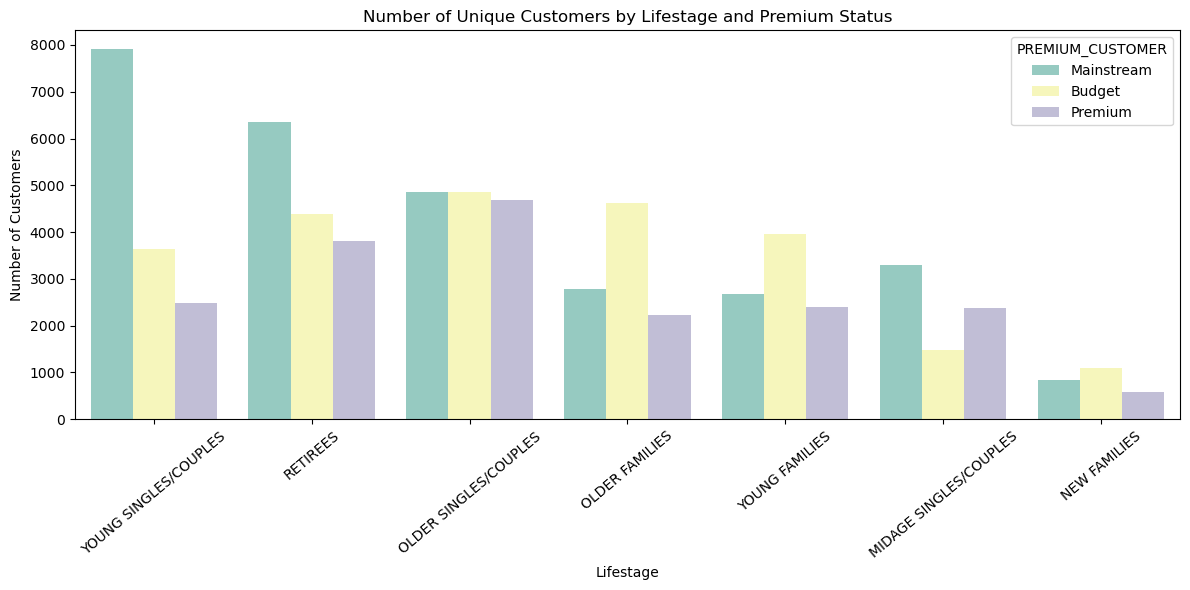

In [144]:
#visualize

plt.figure(figsize=(12, 6))
sns.barplot(
    data=customer_by_segment,
    x='LIFESTAGE',
    y='NUM_CUSTOMERS',
    hue='PREMIUM_CUSTOMER',
    palette='Set3'
)

plt.title('Number of Unique Customers by Lifestage and Premium Status')
plt.ylabel('Number of Customers')
plt.xlabel('Lifestage')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

In [146]:
#calculate units per customer

# Group by segment and calculate:
# - Total units (PROD_QTY)
# - Unique customers
units_per_customer = (
    merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(TOTAL_UNITS=('PROD_QTY', 'sum'),
         NUM_CUSTOMERS=('LYLTY_CARD_NBR', 'nunique'))
    .reset_index()
)

# Calculate average units per customer
units_per_customer['AVG_UNITS_PER_CUSTOMER'] = (
    units_per_customer['TOTAL_UNITS'] / units_per_customer['NUM_CUSTOMERS']
)

print(units_per_customer.sort_values(by='AVG_UNITS_PER_CUSTOMER', ascending=False))

                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_UNITS  NUM_CUSTOMERS  \
7           OLDER FAMILIES       Mainstream        25804           2788   
6           OLDER FAMILIES           Budget        41853           4611   
8           OLDER FAMILIES          Premium        20239           2231   
15          YOUNG FAMILIES           Budget        34482           3953   
17          YOUNG FAMILIES          Premium        20901           2398   
16          YOUNG FAMILIES       Mainstream        23194           2685   
9    OLDER SINGLES/COUPLES           Budget        32883           4849   
11   OLDER SINGLES/COUPLES          Premium        31695           4682   
10   OLDER SINGLES/COUPLES       Mainstream        32607           4858   
1   MIDAGE SINGLES/COUPLES       Mainstream        21213           3298   
12                RETIREES           Budget        26932           4385   
14                RETIREES          Premium        23266           3812   
2   MIDAGE SINGLES/COUPLE

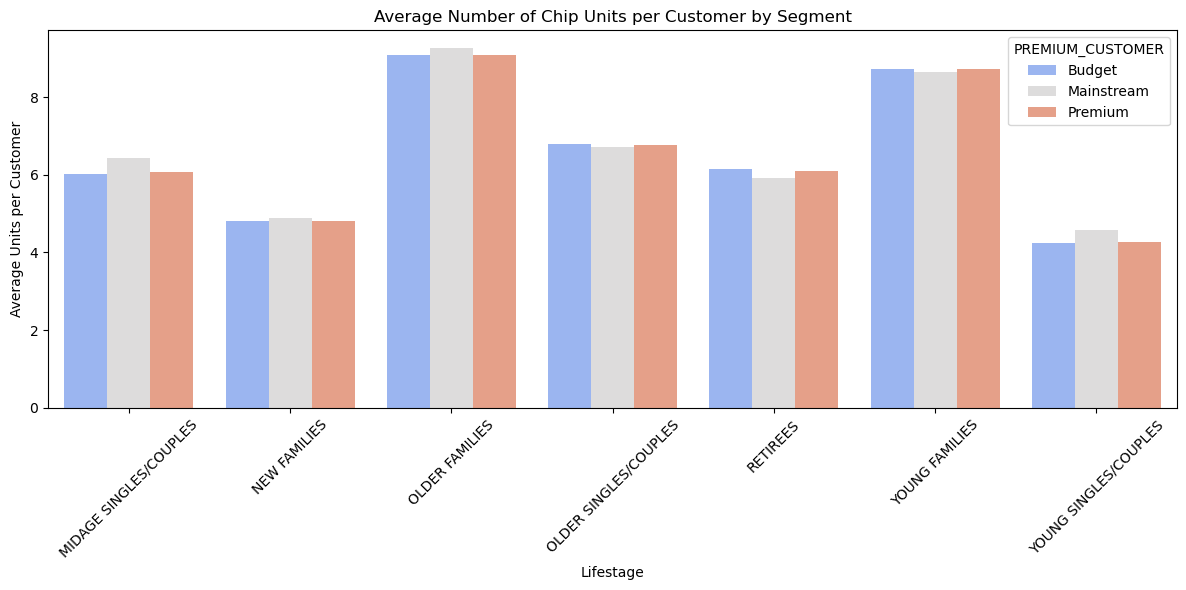

In [150]:
#visualize

plt.figure(figsize=(12, 6))
sns.barplot(
    data=units_per_customer,
    x='LIFESTAGE',
    y='AVG_UNITS_PER_CUSTOMER',
    hue='PREMIUM_CUSTOMER',
    palette='coolwarm'
)

plt.title('Average Number of Chip Units per Customer by Segment')
plt.ylabel('Average Units per Customer')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [152]:
# Calculate Average price per unit

# Group by LIFESTAGE and PREMIUM_CUSTOMER to get total sales and total units
avg_price_by_segment = (
    merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(TOTAL_SALES=('TOT_SALES', 'sum'),
         TOTAL_UNITS=('PROD_QTY', 'sum'))
    .reset_index()
)

# Calculate average price per unit
avg_price_by_segment['AVG_PRICE_PER_UNIT'] = (
    avg_price_by_segment['TOTAL_SALES'] / avg_price_by_segment['TOTAL_UNITS']
)

print(avg_price_by_segment.sort_values(by='AVG_PRICE_PER_UNIT', ascending=False))


                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_SALES  TOTAL_UNITS  \
19   YOUNG SINGLES/COUPLES       Mainstream    147582.20        36225   
1   MIDAGE SINGLES/COUPLES       Mainstream     84734.25        21213   
4             NEW FAMILIES       Mainstream     15979.70         4060   
12                RETIREES           Budget    105916.30        26932   
3             NEW FAMILIES           Budget     20607.45         5241   
14                RETIREES          Premium     91296.65        23266   
11   OLDER SINGLES/COUPLES          Premium    123537.55        31695   
9    OLDER SINGLES/COUPLES           Budget    127833.60        32883   
5             NEW FAMILIES          Premium     10760.80         2769   
13                RETIREES       Mainstream    145168.95        37677   
10   OLDER SINGLES/COUPLES       Mainstream    124648.50        32607   
2   MIDAGE SINGLES/COUPLES          Premium     54443.85        14400   
15          YOUNG FAMILIES           Budget    1297

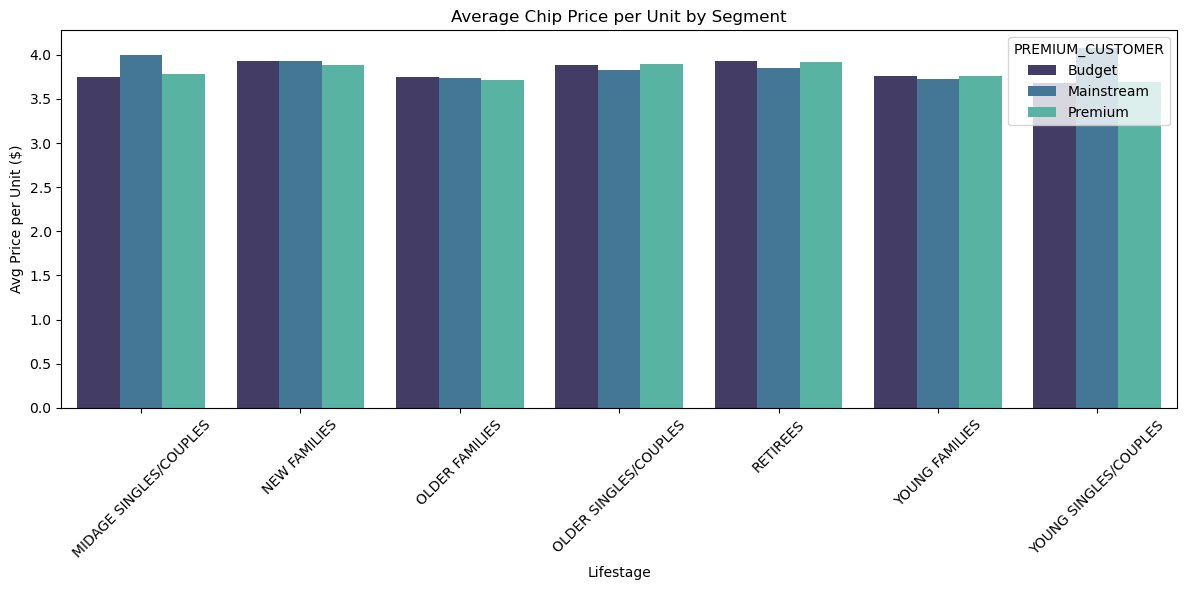

In [154]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_price_by_segment,
    x='LIFESTAGE',
    y='AVG_PRICE_PER_UNIT',
    hue='PREMIUM_CUSTOMER',
    palette='mako'
)

plt.title('Average Chip Price per Unit by Segment')
plt.ylabel('Avg Price per Unit ($)')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [175]:
#T-test
#Filter relevant customer segments

filtered_data = merged_data[
    merged_data['LIFESTAGE'].isin([
        'YOUNG SINGLES/COUPLES',
        'MIDAGE SINGLES/COUPLES'
    ])
]

print(filtered_data)
#Calculate Unit Price per transaction
filtered_data['PRICE_PER_UNIT'] = filtered_data['TOT_SALES'] / filtered_data['PROD_QTY']


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
246735 2019-03-09        272          272319  270088        89   
246736 2018-08-13        272          272358  270154        74   
246737 2018-11-06        272          272379  270187        51   
246738 2018-12-27        272          272379  270188        42   
246739 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

C:\Users\shrey\AppData\Local\Temp\ipykernel_18124\3432958803.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PRICE_PER_UNIT'] = filtered_data['TOT_SALES'] / filtered_data['PROD_QTY']


In [179]:
#Split DAta: Mainstream vs Others

from scipy.stats import ttest_ind

# Split groups
mainstream = filtered_data[filtered_data['PREMIUM_CUSTOMER'] == 'Mainstream']['PRICE_PER_UNIT']
others = filtered_data[filtered_data['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])]['PRICE_PER_UNIT']


In [184]:
#Perform Independent T-Test

t_stat, p_value = ttest_ind(mainstream, others, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ The difference in price per unit is statistically significant.")
else:
    print("❌ The difference is not statistically significant.")

T-statistic: 37.6244
P-value: 0.0000
✅ The difference in price per unit is statistically significant.


In [186]:
# Deep dive into chip brand preferences for the segment Mainstream - Young Singles/Couples
# Affinity analysis or a-priori analysis

#step 1: filter
target_segment = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

#Step 2: Calculate Brand Affinity Score

# % of transactions per brand for this segment
segment_brand_pct = (
    target_segment['BRAND'].value_counts(normalize=True)
    .rename('segment_pct')
    .reset_index()
    .rename(columns={'index': 'BRAND'})
)

# % of transactions per brand overall
overall_brand_pct = (
    merged_data['BRAND'].value_counts(normalize=True)
    .rename('overall_pct')
    .reset_index()
    .rename(columns={'index': 'BRAND'})
)

# Merge both
brand_affinity = pd.merge(segment_brand_pct, overall_brand_pct, on='BRAND')

# Calculate affinity score
brand_affinity['affinity_ratio'] = brand_affinity['segment_pct'] / brand_affinity['overall_pct']

# Sort by affinity
brand_affinity = brand_affinity.sort_values(by='affinity_ratio', ascending=False)

print(brand_affinity)


         BRAND  segment_pct  overall_pct  affinity_ratio
10    TYRRELLS     0.031672     0.026108        1.213098
6     TWISTIES     0.046050     0.038316        1.201858
1      DORITOS     0.121725     0.102229        1.190712
7     TOSTITOS     0.045538     0.038385        1.186370
0       KETTLE     0.196684     0.167334        1.175400
2     PRINGLES     0.118451     0.101735        1.164310
11       GRAIN     0.029472     0.025419        1.159425
9         COBS     0.044208     0.039284        1.125335
4    INFUZIONS     0.063958     0.057555        1.111264
5        THINS     0.059660     0.057044        1.045867
14    CHEEZELS     0.017704     0.018655        0.948989
3       SMITHS     0.098291     0.123016        0.799009
16     CHEETOS     0.008494     0.011863        0.715997
18      FRENCH     0.003991     0.005747        0.694456
8          RRD     0.044771     0.066147        0.676842
13     NATURAL     0.020160     0.030271        0.665978
15         CCS     0.011359    

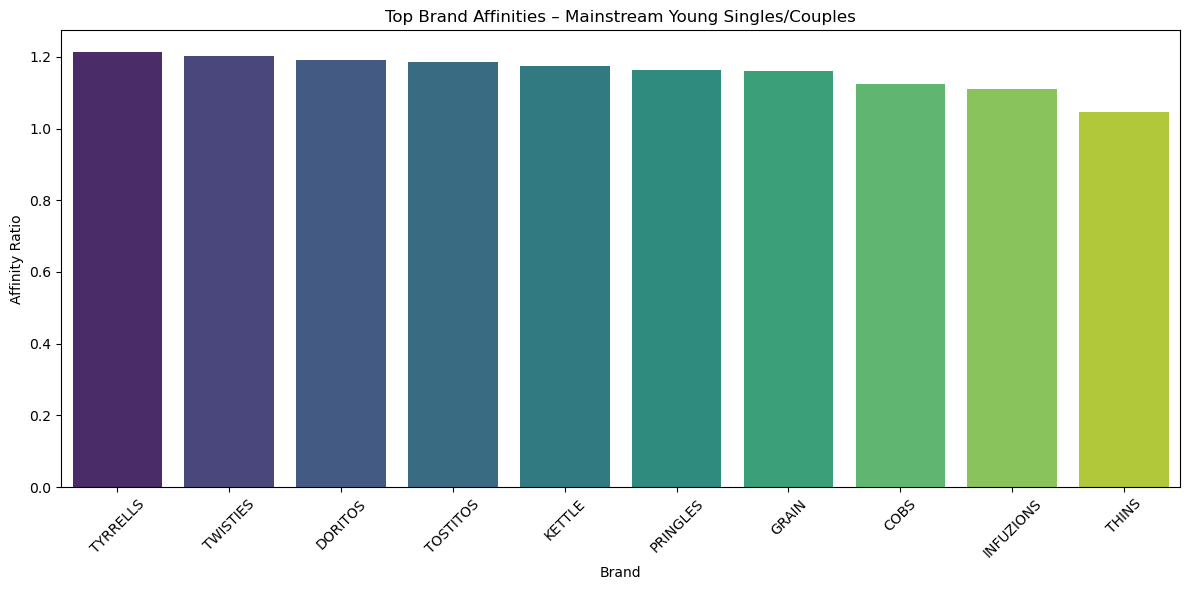

In [192]:
#step 3: Visualize

plt.figure(figsize=(12, 6))
sns.barplot(
    data=brand_affinity.head(10),
    x='BRAND',
    y='affinity_ratio',
    hue='BRAND',               
    palette='viridis',
    legend=False
)
plt.title('Top Brand Affinities – Mainstream Young Singles/Couples')
plt.ylabel('Affinity Ratio')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [194]:
'''
Affinity > 1.0 → over-represented among this segment (they prefer this brand more than average).

Affinity < 1.0 → under-represented (they prefer it less than the overall population).
'''

'\nAffinity > 1.0 → over-represented among this segment (they prefer this brand more than average).\n\nAffinity < 1.0 → under-represented (they prefer it less than the overall population).\n'

In [196]:
# Mainstream – Young Singles/Couples) prefers larger pack sizes compared to the rest of the population

target_segment = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

#Calculate pack size affinity
# % of transactions per PACK_SIZE in the target segment
segment_pack_pct = (
    target_segment['PACK_SIZE'].value_counts(normalize=True)
    .rename('segment_pct')
    .reset_index()
    .rename(columns={'index': 'PACK_SIZE'})
)

# % of transactions per PACK_SIZE in the total population
overall_pack_pct = (
    merged_data['PACK_SIZE'].value_counts(normalize=True)
    .rename('overall_pct')
    .reset_index()
    .rename(columns={'index': 'PACK_SIZE'})
)

# Merge and calculate affinity ratio
pack_affinity = pd.merge(segment_pack_pct, overall_pack_pct, on='PACK_SIZE')
pack_affinity['affinity_ratio'] = pack_affinity['segment_pct'] / pack_affinity['overall_pct']

# Sort by affinity
pack_affinity = pack_affinity.sort_values(by='affinity_ratio', ascending=False)

print(pack_affinity)


    PACK_SIZE  segment_pct  overall_pct  affinity_ratio
8       270.0     0.031723     0.025472        1.245410
7       380.0     0.032030     0.026003        1.231788
5       330.0     0.061144     0.050823        1.203085
2       134.0     0.118451     0.101735        1.164310
9       210.0     0.029472     0.025419        1.159425
3       110.0     0.104943     0.090731        1.156634
10      135.0     0.014838     0.013200        1.124104
11      250.0     0.014327     0.012843        1.115480
4       170.0     0.080587     0.080988        0.995052
1       150.0     0.157593     0.162937        0.967205
0       175.0     0.255679     0.269069        0.950239
6       165.0     0.056386     0.061996        0.909497
13      190.0     0.007573     0.012138        0.623866
16      180.0     0.003582     0.005950        0.602002
15      160.0     0.006549     0.012037        0.544101
14       90.0     0.006549     0.012191        0.537228
17       70.0     0.003223     0.006108        0

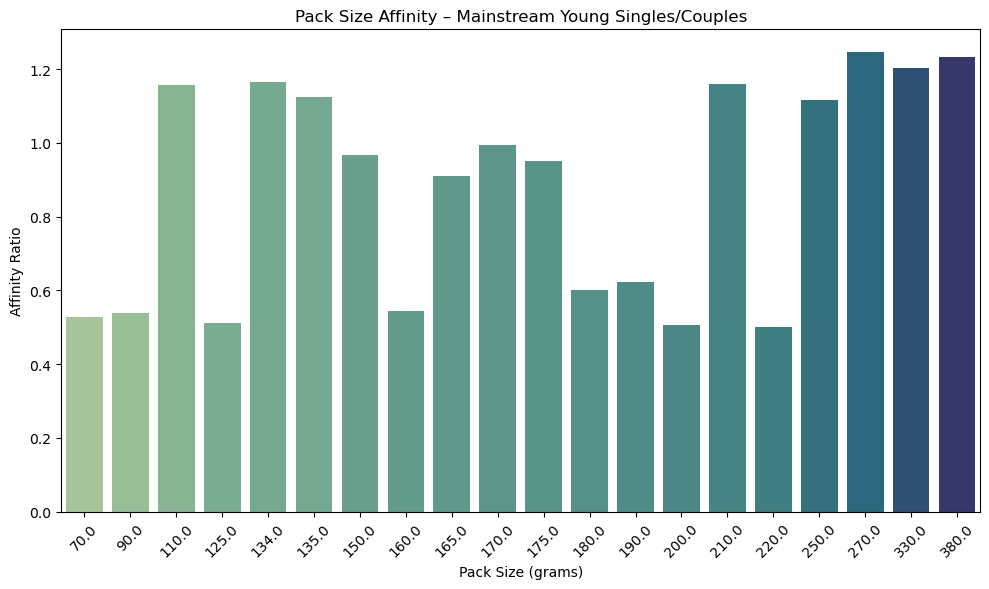

In [198]:
# Visualize

plt.figure(figsize=(10, 6))
sns.barplot(
    data=pack_affinity,
    x='PACK_SIZE',
    y='affinity_ratio',
    hue='PACK_SIZE',     # Avoid the future warning
    palette='crest',
    legend=False
)

plt.title('Pack Size Affinity – Mainstream Young Singles/Couples')
plt.ylabel('Affinity Ratio')
plt.xlabel('Pack Size (grams)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [202]:
'''
Affinity Ratio > 1: this pack size is preferred more by the segment than the average customer.

Affinity Ratio < 1: this pack size is less preferred than by the general population.
'''

'\nAffinity Ratio > 1: this pack size is preferred more by the segment than the average customer.\n\nAffinity Ratio < 1: this pack size is less preferred than by the general population.\n'